In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv("train.csv")
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Survived : 0 = perished / 1 = survived

### Count of unique values of data_train

In [3]:
data_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data_test = pd.read_csv('test.csv')
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Count of unique values of data_test

In [6]:
data_test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### object into int64 in Sex

In [8]:
map_dict = {'female' : 0, 'male' : 1}
data_train['Sex'] = data_train['Sex'].map(map_dict).astype(int)
data_test['Sex'] = data_test['Sex'].map(map_dict).astype(int)

In [9]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


### The percentage of Survived and Perished

In [11]:
pos = data_train.Survived.value_counts() / data_train.Survived.value_counts().sum()
pos

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<Axes: >

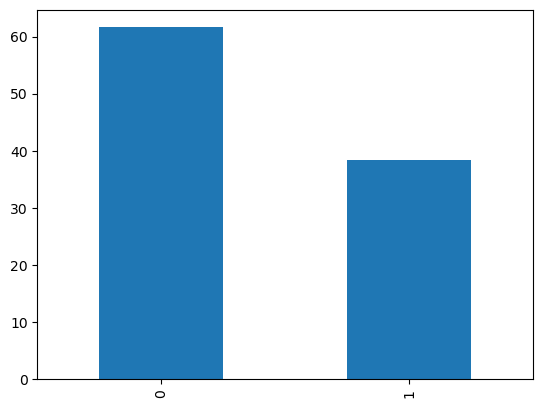

In [12]:
(pos * 100).plot.bar()

### The percentage of each Pclass

In [13]:
pop = data_train.Pclass.value_counts() / data_train.Pclass.value_counts().sum()
pop

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

<Axes: >

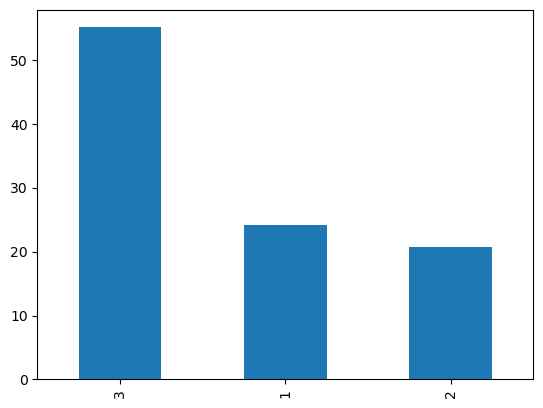

In [14]:
(pop * 100).plot.bar()

### The percentage of Sex

In [15]:
pox = data_train.Sex.value_counts() / data_train.Sex.value_counts().sum()
pox

1    0.647587
0    0.352413
Name: Sex, dtype: float64

<Axes: >

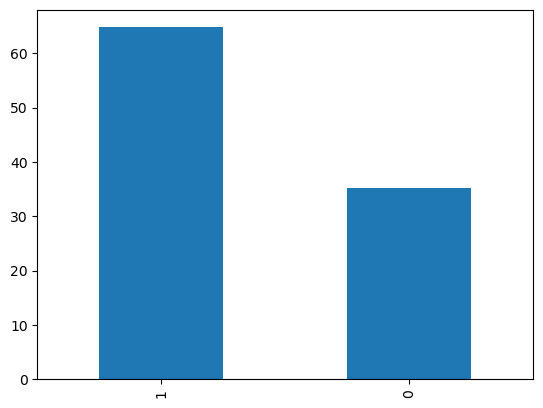

In [16]:
(pox * 100).plot.bar()

### The correlation between Pclass and Survived

In [17]:
PS_train = data_train[['Pclass', 'Survived']]
PS_train.groupby('Pclass').mean().sort_values(by = 'Survived', ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### The correlation between Sex and Survived

In [18]:
SS_train = data_train[['Sex', 'Survived']]
SS_train.groupby('Sex').mean().sort_values(by = 'Survived', ascending = False)

,Survived
Sex,
0,0.742038
1,0.188908


### The correlation between SibSp and Survived

In [19]:
SibS_train = data_train[['SibSp', 'Survived']]
SibS_train.groupby('SibSp').mean().sort_values(by = 'Survived', ascending = False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


It doesn't seem to be highly correlated.

### The correlation between Parch and Survived

In [20]:
ParS_train = data_train[['Parch', 'Survived']]
ParS_train.groupby('Parch').mean().sort_values(by = 'Survived', ascending = False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


It doesn't seem to be highly correlated.

### The correlation between Age and Survived

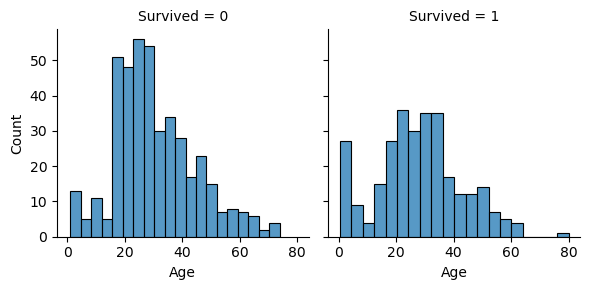

In [21]:
a = sns.FacetGrid(data_train, col = 'Survived')
a.map(sns.histplot, 'Age', bins = 20)

### The correlation between Sex and Survived in terms of Pclass

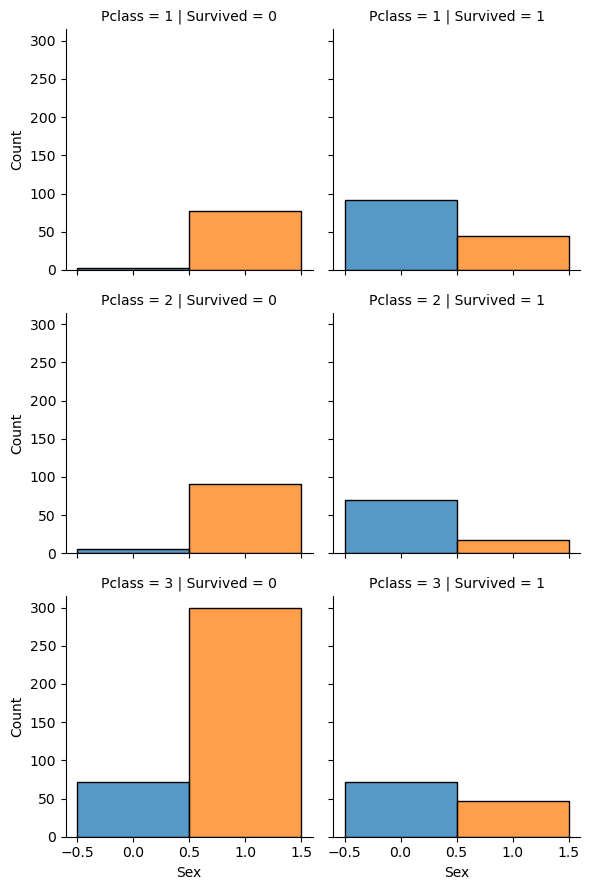

In [22]:
b = sns.FacetGrid(data_train, col = 'Survived', row = 'Pclass', hue = 'Sex')
b.map(sns.histplot, 'Sex')

### The correlation between Age and Survived in terms of Pclass

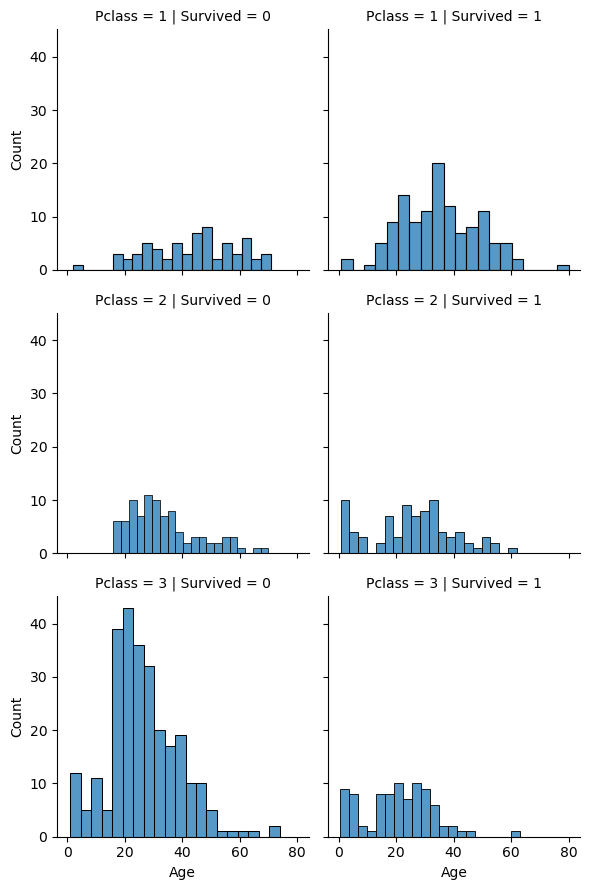

In [23]:
c = sns.FacetGrid(data_train, col = 'Survived', row = 'Pclass')
c.map(sns.histplot, 'Age', bins = 20)

### The correlation between Embarked and Survived

In [24]:
ParS_train = data_train[['Embarked', 'Survived']]
ParS_train.groupby('Embarked').mean().sort_values(by = 'Survived', ascending = False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


### Remove less correlated columns in data_train and date_test

In [25]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
df_train = data_train.drop(columns = ['Name', 'Ticket', 'Cabin'], axis = 1)

In [27]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,S
887,888,1,1,0,19.0,0,0,30.0000,S
888,889,0,3,0,NaN,1,2,23.4500,S
889,890,1,1,1,26.0,0,0,30.0000,C


In [28]:
df_test = data_test.drop(columns = ['Name', 'Ticket', 'Cabin'], axis = 1)

In [29]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,Q
1,893,3,0,47.0,1,0,7.0000,S
2,894,2,1,62.0,0,0,9.6875,Q
3,895,3,1,27.0,0,0,8.6625,S
4,896,3,0,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,8.0500,S
414,1306,1,0,39.0,0,0,108.9000,C
415,1307,3,1,38.5,0,0,7.2500,S
416,1308,3,1,NaN,0,0,8.0500,S


In [30]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [31]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

### Fill NaNs with mean of Age

In [32]:
df_train.fillna(df_train.mean()[['Age']], inplace = True)
df_test.fillna(df_test.mean()[['Age']], inplace = True)

/var/folders/rn/1g8rqj5d17qfnrt_mh2v_35c0000gn/T/ipykernel_6277/4206796678.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.fillna(df_train.mean()[['Age']], inplace = True)
/var/folders/rn/1g8rqj5d17qfnrt_mh2v_35c0000gn/T/ipykernel_6277/4206796678.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test.fillna(df_test.mean()[['Age']], inplace = True)


In [33]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [34]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

### Categorise Age

In [35]:
pd.DataFrame(df_train.Age.describe())

,Age
count,891.000000
mean,29.699118
std,13.002015
min,0.420000
25%,22.000000
50%,29.699118
75%,35.000000
max,80.000000


In [36]:
def function(x) :
    if x < 10 :
        return 0
    if 10 <= x < 20 :
        return 1
    if 20 <= x < 30 :   
        return 2
    if 30 <= x < 40 :
        return 3
    if 40 <= x < 50 :
        return 4
    if 50 <= x < 60 :
        return 5
    if 60 <= x < 70 :
        return 6
    if 70 <= x < 80 :
        return 7
    if 80 <= x < 90 :
        return 8
    else:
        return 9

In [37]:
df_train['Age'] = df_train['Age'].apply(function)
df_test['Age'] = df_test['Age'].apply(function)

In [38]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,2,1,0,7.2500,S
1,2,1,1,0,3,1,0,71.2833,C
2,3,1,3,0,2,0,0,7.9250,S
3,4,1,1,0,3,1,0,53.1000,S
4,5,0,3,1,3,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,2,0,0,13.0000,S
887,888,1,1,0,1,0,0,30.0000,S
888,889,0,3,0,2,1,2,23.4500,S
889,890,1,1,1,2,0,0,30.0000,C


In [39]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,3,0,0,7.8292,Q
1,893,3,0,4,1,0,7.0000,S
2,894,2,1,6,0,0,9.6875,Q
3,895,3,1,2,0,0,8.6625,S
4,896,3,0,2,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,1,3,0,0,8.0500,S
414,1306,1,0,3,0,0,108.9000,C
415,1307,3,1,3,0,0,7.2500,S
416,1308,3,1,3,0,0,8.0500,S


### Fill NaNs with mode of Embarked

In [40]:
df_test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [41]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,0,3,0,0,80.0,NaN
829,830,1,1,0,6,0,0,80.0,NaN


In [42]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [43]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [44]:
df_train.loc[[62, 829]]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
62,63,0,1,1,4,1,0,83.475,S
829,830,1,1,0,6,0,0,80.000,S


### object into int64 in Embarked
S = 1
C = 2
Q = 3

In [45]:
map_dict = {'S' : 1, 'C' : 2, 'Q' : 3}
df_train['Embarked'] = df_train['Embarked'].map(map_dict).astype(int)
df_test['Embarked'] = df_test['Embarked'].map(map_dict).astype(int)

In [46]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,2,1,0,7.2500,1
1,2,1,1,0,3,1,0,71.2833,2
2,3,1,3,0,2,0,0,7.9250,1
3,4,1,1,0,3,1,0,53.1000,1
4,5,0,3,1,3,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,2,0,0,13.0000,1
887,888,1,1,0,1,0,0,30.0000,1
888,889,0,3,0,2,1,2,23.4500,1
889,890,1,1,1,2,0,0,30.0000,2


In [47]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,3,0,0,7.8292,3
1,893,3,0,4,1,0,7.0000,1
2,894,2,1,6,0,0,9.6875,3
3,895,3,1,2,0,0,8.6625,1
4,896,3,0,2,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,1305,3,1,3,0,0,8.0500,1
414,1306,1,0,3,0,0,108.9000,2
415,1307,3,1,3,0,0,7.2500,1
416,1308,3,1,3,0,0,8.0500,1


### Fill NaNs with mean of Fare in df_test

In [48]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [49]:
df_test.fillna(df_test.mean()[['Fare']], inplace = True)

In [50]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
Y = df_train["Survived"]
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

In [64]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, Y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})

In [70]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [71]:
output.to_csv('submission.csv', index=False)